# Gendered differences in Math-Confidence

## Introduction

In this assignment we will explore gender differences in math achievments and confidence. First we construct and clean a dataset, to analyse this topic. We further illustrate the results, for example by using interactive plots.

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


# Read and clean data

We utilize data from Timms International Database (https://timss2019.org/international-database/). The database includes student achievement data as well as student, home, teacher, school, and national context data for 64 countries and 8 benchmarking participants. We import our datasets from a CSV-files to a panda dataframe and then keep only the variables we need.

The first dataset is at student level:

In [2]:
student = pd.read_csv('asgdnkz7.csv')

#Keep only the columns we need
cols_to_keep_s = ['IDSTUD', 'ASBG01', 'ASBG04', 'ASBGDML', 'ASBGSLM', 'ASBGSCM', 'ASMMAT01']

student = student[cols_to_keep_s]

#Drop rows with missing values for our primary variables
student = student.dropna(subset=['IDSTUD', 'ASBG01', 'ASBGSCM', 'ASMMAT01'])

#Make the gender variable a dummy 
student['ASBG01'] = student['ASBG01'].replace({1: 0, 2: 1}).astype(int)

#Make the number of books variable to a dummy 
student['ASBG04'] = student['ASBG04'].apply(lambda x: 1 if x > 3 else 0)

#Rename variables
student = student.rename(columns={
    'ASBG01': 'male',
    'ASBG04': 'many_books',
    'ASBGDML': 'bad_beh_mat', 
    'ASBGSLM': 'like_mat', 
    'ASBGSCM': 'conf_mat', 
    'ASMMAT01': 'score_mat'
})

student

,IDSTUD,male,many_books,bad_beh_mat,like_mat,conf_mat,score_mat
0,50010101.0,1,0,10.17203,7.98325,9.67422,564.16173
1,50010102.0,1,1,9.65042,8.17345,9.42421,589.88375
2,50010103.0,0,0,9.15042,9.72723,11.70061,514.63289
3,50010106.0,0,0,12.34583,3.85307,6.32925,422.80754
4,50010107.0,1,0,10.79976,3.85307,7.70454,470.52185
...,...,...,...,...,...,...,...
3688,52020115.0,0,0,11.19445,8.14669,8.85216,519.89076
3689,52020120.0,1,0,9.65042,8.14669,9.22621,535.43639
3690,52020121.0,1,0,10.17203,9.31319,11.14456,523.01763
3691,52020123.0,0,0,8.61844,7.63586,7.91361,419.64660


The data consists of the variables: student ID, male (1 for male, 0 for female), many_books (do they have many or few books at home), bad_beh_math (a score indicating bad behaviour in math class), like_mat (a score inicating if they like math), conf_mat (a score indicating if they are confident in math), and score math (their mathematics score).

The second dataset is at teacher level:

In [3]:
teacher = pd.read_csv('atgdnkz7.csv')

#Keep only the columns we need
cols_to_keep_t = ['IDTEALIN', 'IDLINK', 'ATBG02', 'ATBG05AC', 'ATDMMEM']

teacher = teacher[cols_to_keep_t]

#Drop rows with missing values for our primary variables
teacher = teacher.dropna(subset=['IDTEALIN', 'IDLINK', 'ATBG02', 'ATDMMEM'])

#Make the gender variable a dummy 
teacher['ATBG02'] = teacher['ATBG02'].replace({1: 0, 2: 1}).astype(int)

#Make the major in mathemathics variable a dummy 
teacher['ATBG05AC'] = teacher['ATBG05AC'].replace({2: 0})

#Make the education categorical variable to dummies
dummies = pd.get_dummies(teacher['ATDMMEM'])
dummies.columns = ['mat_and_educ', 'educ', 'mat', 'other_major', 'no_major']

dummies = dummies.astype(int)

#merge the new dummies to the teacher dataset
teacher = pd.concat([teacher, dummies], axis=1)

#Rename the major variable values to string 
teacher['ATDMMEM'] = teacher['ATDMMEM'].replace({1: 'mat and educ', 2: 'educ', 3: 'mat', 4: 'other major', 5: 'no major'})

#Rename variables
teacher = teacher.rename(columns={
    'ATBG02': 'male_t',
    'ATBG05AC': 'mat_major',
    'ATDMMEM': 'major'
})

teacher

,IDTEALIN,IDLINK,male_t,mat_major,major,mat_and_educ,educ,mat,other_major,no_major
0,50010101.0,1.0,0,1.0,mat,0,0,1,0,0
1,50020103.0,3.0,1,1.0,mat and educ,1,0,0,0,0
2,50020204.0,4.0,1,1.0,mat,0,0,1,0,0
3,50030202.0,2.0,1,0.0,other major,0,0,0,1,0
4,50030404.0,4.0,1,0.0,other major,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
302,52000101.0,1.0,1,1.0,mat,0,0,1,0,0
305,52000303.0,3.0,0,1.0,mat and educ,1,0,0,0,0
306,52010101.0,1.0,1,0.0,educ,0,1,0,0,0
307,52020101.0,1.0,1,0.0,other major,0,0,0,1,0


The data consists of the variables: IDTEALIN and IDLINK (to link the teacher to the student), male_t (1 for male, 0 for female), mat_major (1 if they have en major in math), mat_and_educ (1 if they major in both math and education), educ (1 if they major only in education), math (1 if they major only in math), other_major (1 if they have other major), and no_major (1 if they have no major). That is mat_major takes the value 1 if either mat_and_educ==1 or mat==1.

The third dataset is a link-dataset which we use to merge the students with their respective teacher.

In [4]:
ts_link = pd.read_csv('astdnkz7.csv')

#Keep only the columns we need
cols_to_keep_ts = ['IDSTUD', 'IDTEALIN', 'IDLINK', 'MATSUBJ']
ts_link = ts_link[cols_to_keep_ts]

#Drop rows with missing values for our primary variables
ts_link = ts_link.dropna(subset=['IDSTUD', 'IDTEALIN', 'IDLINK', 'MATSUBJ'])
ts_link.head(20)

ts_link

,IDSTUD,IDTEALIN,IDLINK,MATSUBJ
0,50010101.0,50010101.0,1.0,1.0
1,50010102.0,50010101.0,1.0,1.0
2,50010103.0,50010101.0,1.0,1.0
3,50010106.0,50010101.0,1.0,1.0
4,50010107.0,50010101.0,1.0,1.0
...,...,...,...,...
5867,52020121.0,52020101.0,1.0,1.0
5868,52020123.0,52020101.0,1.0,1.0
5869,52020123.0,52020202.0,2.0,0.0
5870,52020124.0,52020202.0,2.0,0.0


Including the link dataset, allows us to use the IDLINK variable which is contained in both the student and teacher dataset. Furthermore in this dataset, it is stated whether the teacher-student cell is math-class specifik. That is if the specific teacher is the math teacher for that specific student

## Explore each data set

In order to be able to explore the student and teacher datasets, we provide some interactive plots. 

We start with the student dataset

In [26]:
# Count the number of males and females
gender_counts = student['male'].value_counts()

# Display the counts
print(f"Number of males: {gender_counts[1]}")
print(f"Number of females: {gender_counts[0]}")

# Labeling the variables, to make the plots readable

column_labels = {
    'male': 'male student',
    'many_books': 'many books in the houeshold',
    'bad_beh_mat': 'bad behaviour i math class',
    'like_mat': 'student likes math',
    'score_mat': 'math score',
    'conf_mat': 'confidence in math',
    'male_t': 'male teacher',
    'mat_major': 'major in math',
    'mat_and_educ': 'major in math and education',
    'educ': 'major only in education',
    'mat': 'major only in math',
    'other_major': 'other major',
    'no_major': 'no major'
    
}

Number of males: 1806
Number of females: 1836


Since the number of males and females differ, we present the variables af a percentage of the respective genders. For this we use histograms (defaults to 10 bins).

In [27]:
student = pd.DataFrame(student)

def plot_func_s(column):
    colors = {1: 'blue', 0: 'orange'}  # blue for male, green for female
    labels = {1: 'Male', 0: 'Female'}
    
    plt.figure(figsize=(10, 6))
    
    genders = student['male'].unique()
    data = [student[student['male'] == gender][column] for gender in genders]
    weights = [np.ones(len(student[student['male'] == gender])) / len(student[student['male'] == gender]) * 100 for gender in genders]
    
    plt.hist(data, rwidth=0.8, alpha=0.5, label=[labels[gender] for gender in genders], color=[colors[gender] for gender in genders], weights=weights, stacked=False, histtype='bar')
    
    plt.ylabel('Percentage')
    column_label = column_labels.get(column, column)
    plt.title(f'Distribution of {column_label} across gender')
    plt.legend()
    plt.show()

columns_s = ['many_books', 'bad_beh_mat', 'like_mat', 'conf_mat', 'score_mat']
widgets.interact(plot_func_s, column=widgets.Dropdown(options=columns_s, value='many_books', description='Column:'))

interactive(children=(Dropdown(description='Column:', options=('many_books', 'bad_beh_mat', 'like_mat', 'conf_…

<function __main__.plot_func_s(column)>

### Many books
We observe that the difference between gender in how many books are in their homes (a proxy for cultural capital) is small. Only a few percentage points more females than male live in a home with many books.
### Bad behviour in math class
For this variable a high score responds to very bad behavior. With this in mind we see a slight difference between genders, where more females than males have a high score, and more males have a low score. Especially we see a larger share of females with a score in the range of 11.
### Likes math
We see here a tendency, that a larger share of boys likes math a lot, whereas a larger share of the girls like the course a medium amount.
### Confidence in math
Also, a larger share of the boys tend to have very high confedence in math, wheras the girls have more density around the lower scores of math confedence
### Math score
In this variable, we also see a larger share of boys performing very well on the standardized math test. A larger share of girls perform in the range of 500 point.

We then look at the teacher dataset

In [28]:
def plot_func_t(column):
    teacher[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.ylabel('')
    column_label = column_labels.get(column, column)
    plt.title(f'Share of {column_label}')
    plt.show()

columns_t = ['male_t', 'mat_major', 'major', 'mat_and_educ', 'educ', 'mat', 'other_major', 'no_major']
widgets.interact(plot_func_t, column=widgets.Dropdown(options=columns_t, value='male_t', description='Column:'))

interactive(children=(Dropdown(description='Column:', options=('male_t', 'mat_major', 'major', 'mat_and_educ',…

<function __main__.plot_func_t(column)>

### Male teacher
we see that the majority of teacher are female
### Major in math
We see that the majority of teachers have majored in math.
### Major
The largest share of teachers major only in math and not education. The smallest share of teachers have no major, and only 14.3 pct. major only in education.

# Merge data sets

We start by merging teacher and link data. Then we merge this with students data.

In [8]:
# Now we merge 'teacher' with 'ts_link' to have the whole dataset:
teacher_merged = pd.merge(teacher, ts_link, on=['IDTEALIN', 'IDLINK'], how='inner')
teacher_merged = teacher_merged[teacher_merged['MATSUBJ'] == 1]
teacher_merged

,IDTEALIN,IDLINK,male_t,mat_major,major,mat_and_educ,educ,mat,other_major,no_major,IDSTUD,MATSUBJ
0,50010101.0,1.0,0,1.0,mat,0,0,1,0,0,50010101.0,1.0
1,50010101.0,1.0,0,1.0,mat,0,0,1,0,0,50010102.0,1.0
2,50010101.0,1.0,0,1.0,mat,0,0,1,0,0,50010103.0,1.0
3,50010101.0,1.0,0,1.0,mat,0,0,1,0,0,50010106.0,1.0
4,50010101.0,1.0,0,1.0,mat,0,0,1,0,0,50010107.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4613,52020101.0,1.0,1,0.0,other major,0,0,0,1,0,52020115.0,1.0
4614,52020101.0,1.0,1,0.0,other major,0,0,0,1,0,52020120.0,1.0
4615,52020101.0,1.0,1,0.0,other major,0,0,0,1,0,52020121.0,1.0
4616,52020101.0,1.0,1,0.0,other major,0,0,0,1,0,52020123.0,1.0


Here we are dropping elements from both data set teacher and data set ts_link. A left join would keep all observations in data teacher intact and subset only from ts_link.

We now do a left merge between the student dataset and the teacher_merged dataset, ensuring that we keep all observations in the student dataset 

In [9]:
# Now we merge 'teacher' with 'ts_link' to have the whole dataset:
student_merged = pd.merge(student, teacher_merged, on=['IDSTUD'], how='left')
student_merged

,IDSTUD,male,many_books,bad_beh_mat,like_mat,conf_mat,score_mat,IDTEALIN,IDLINK,male_t,mat_major,major,mat_and_educ,educ,mat,other_major,no_major,MATSUBJ
0,50010101.0,1,0,10.17203,7.98325,9.67422,564.16173,50010101.0,1.0,0.0,1.0,mat,0.0,0.0,1.0,0.0,0.0,1.0
1,50010102.0,1,1,9.65042,8.17345,9.42421,589.88375,50010101.0,1.0,0.0,1.0,mat,0.0,0.0,1.0,0.0,0.0,1.0
2,50010103.0,0,0,9.15042,9.72723,11.70061,514.63289,50010101.0,1.0,0.0,1.0,mat,0.0,0.0,1.0,0.0,0.0,1.0
3,50010106.0,0,0,12.34583,3.85307,6.32925,422.80754,50010101.0,1.0,0.0,1.0,mat,0.0,0.0,1.0,0.0,0.0,1.0
4,50010107.0,1,0,10.79976,3.85307,7.70454,470.52185,50010101.0,1.0,0.0,1.0,mat,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,52020115.0,0,0,11.19445,8.14669,8.85216,519.89076,52020101.0,1.0,1.0,0.0,other major,0.0,0.0,0.0,1.0,0.0,1.0
3638,52020120.0,1,0,9.65042,8.14669,9.22621,535.43639,52020101.0,1.0,1.0,0.0,other major,0.0,0.0,0.0,1.0,0.0,1.0
3639,52020121.0,1,0,10.17203,9.31319,11.14456,523.01763,52020101.0,1.0,1.0,0.0,other major,0.0,0.0,0.0,1.0,0.0,1.0
3640,52020123.0,0,0,8.61844,7.63586,7.91361,419.64660,52020101.0,1.0,1.0,0.0,other major,0.0,0.0,0.0,1.0,0.0,1.0


# Analysis

First, we analyse what the relation between confidence and score in maths is and the difference between girls and boys in this regard.

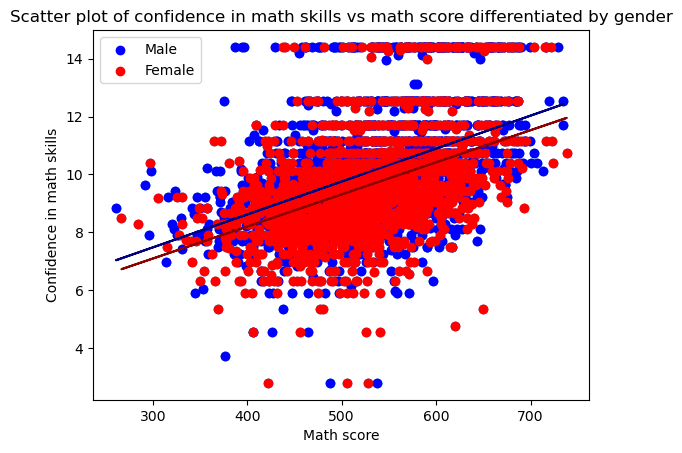

In [10]:
#Scatter plot of the relationship between score in mathematics and cofindence in mathematics
plt.scatter(student_merged['score_mat'], student_merged['conf_mat'])

male = student_merged[student_merged['male'] == 1]
female = student_merged[student_merged['male'] == 0]

# Perform linear regression
slope_m, intercept_m = np.polyfit(male['score_mat'], male['conf_mat'], 1)
slope_f, intercept_f = np.polyfit(female['score_mat'], female['conf_mat'], 1)

plt.scatter(male['score_mat'], male['conf_mat'], color='blue', label='Male')
plt.scatter(female['score_mat'], female['conf_mat'], color='red', label='Female')


# Add tendency line
plt.plot(male['score_mat'], slope_m * male['score_mat'] + intercept_m, color='navy')

# Add tendency line
plt.plot(female['score_mat'], slope_f * female['score_mat'] + intercept_f, color='darkred')

plt.xlabel('Math score')
plt.ylabel('Confidence in math skills')
plt.title('Scatter plot of confidence in math skills vs math score differentiated by gender')
plt.legend()
plt.show()

In general there is a positive relation between confidence and score in math. We see that for the same score in maths, girls tend to have a lower confidence in their ability in maths. 

Next, we analyze wether there is a difference in girls' math scores depending on the gender of their teacher.

In [23]:
#we delete the observation with missing values for teachers gender in the female dataset
female = female.dropna(subset=['male_t'])

# Define a function that plots a bar chart for a selected column
def plot_chart(column):
    mean_values = female.groupby('male_t')[column].mean()
    mean_values.index = mean_values.index.map({1: 'Male', 0: 'Female'})
    color = 'blue' if column == 'score_mat' else 'orange'
    mean_values.plot(kind='bar', alpha=0.75, color=color)
    plt.ylabel('Mean Value')
    plt.xlabel('Gender of teacher')
    column_label = column_labels.get(column, column)
    plt.title(f'Mean values of {column_label} for females depending on the teacher\'s gender')
    plt.show()

# Create a dropdown widget
columns=['score_mat', 'conf_mat']
widgets.interact(plot_chart, column=widgets.Dropdown(options=columns, value='score_mat', description='Column:'))

interactive(children=(Dropdown(description='Column:', options=('score_mat', 'conf_mat'), value='score_mat'), O…

<function __main__.plot_chart(column)>

We see pretty much no difference across score and confidence for female students depeding on the gender of the teacher.  

Lastly, we look at the difference in confidence and scores for all students depending on wheter the teacher has a major in math, math and education, eduction, other major or no major. 

In [29]:
#we delete the observation with missing values for teachers major
student_merged = student_merged.dropna(subset=['major'])

# Define a function that plots a bar chart for a selected column
def plot_chart_all(column):
    mean_values = student_merged.groupby('major')[column].mean()
    color = 'blue' if column == 'score_mat' else 'orange'
    mean_values.plot(kind='bar', alpha=0.75, color=color)
    plt.ylabel('Mean Value')
    column_label = column_labels.get(column, column)
    plt.title(f'Mean values of {column_label} for all depending on the teacher\'s major')
    plt.show()

# Create a dropdown widget
columns=['score_mat', 'conf_mat']
widgets.interact(plot_chart_all, column=widgets.Dropdown(options=columns, value='score_mat', description='Column:'))

interactive(children=(Dropdown(description='Column:', options=('score_mat', 'conf_mat'), value='score_mat'), O…

<function __main__.plot_chart_all(column)>

There is no big difference in the math-scores and math-confidence of the student with teachers having different educational background. Only students with a teacher having a educational (but not mathimatical) background have a little higher average score and confidence. 

# Conclusion

Girls have lower confidence in mathematics than boys with the same obtained scores. Both girls scores and confidence do not depent on the gender of their teacher. Neither the teachers education has a big inpact on the output-variables. The analyzis is only considering correlations and can not be used to conclude anything causal. 